In [403]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [404]:
import os
import pandas as pd

folder = 'Genre Classification Dataset'
train_file = 'train_data.txt'
test_file = 'test_data_solution.txt'

def get_dataframe(file_name):
    data = []

    with open(os.path.join(folder, file_name)) as f:

        lines = f.readlines()

        for idx, line in enumerate(lines):
            
            row = line.split(' ::: ')

            try:
                title = row[1].split(' (')[0]
                year = row[1].split(' (')[1].split(')')[0]
                genre = row[2]
                description = row[3]
                data.append([title, year, genre, description])
            except Exception as exp:
                print(exp)

    return pd.DataFrame(data, columns=['title', 'year', 'genre', 'description'])

df_train = get_dataframe(train_file)
df_test = get_dataframe(test_file)

In [405]:
import numpy as np

print(f"Size of training dataset: {len(df_train)}, test dataset: {len(df_test)}, unique labels: {len(np.unique(df_train['genre']))}")
df_train.head()

Size of training dataset: 54214, test dataset: 54200, unique labels: 27


,title,year,genre,description
0,Oscar et la dame rose,2009,drama,Listening in to a conversation between his doc...
1,Cupid,1997,thriller,A brother and sister with a past incestuous re...
2,"Young, Wild and Wonderful",1980,adult,As the bus empties the students for their fiel...
3,The Secret Sin,1915,drama,To help their unemployed father make ends meet...
4,The Unrecovered,2007,drama,The film's title refers not only to the un-rec...


<AxesSubplot:>

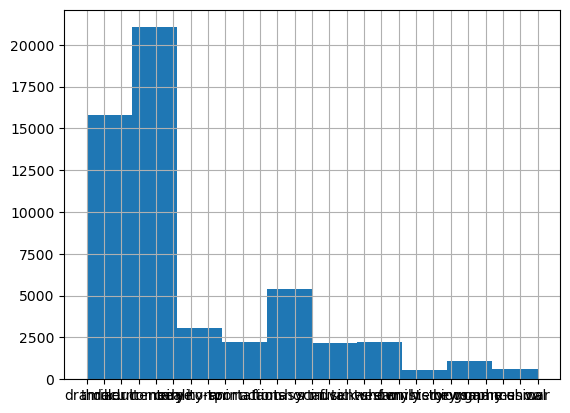

In [480]:
df_train['genre'].hist()

In [406]:
df_test.head()

,title,year,genre,description
0,Edgar's Lunch,1998,thriller,"L.R. Brane loves his life - his car, his apart..."
1,La guerra de papá,1977,comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,Off the Beaten Track,2010,documentary,One year in the life of Albin and his family o...
3,Meu Amigo Hindu,2015,drama,"His father has died, he hasn't spoken with his..."
4,Er nu zhai,1955,drama,Before he was known internationally as a marti...


In [407]:
input_features = ['title', 'year', 'description']
output_features = ['genre']

X_train = df_train[input_features]
y_train = df_train[output_features]

Plan for the model classifying genres based on title, year, description.

1. Vectorize the data:
    - genre2vec (straightforward)
    - title2vec (complex)
    - decription2vec (complex)
2. Build 2 models and unittest them:
    - ready-to-use model from a popular library
    - implement LSTM with PyTorch
    - implement a model using transformers ^^

3. Train & debug models:
    - ready-to-use: 0-small # of bugs expected
    - LSTM: moderate # of bugs expected
    - Transformers: high # of bugs expected

4. Test models

In [408]:
def one_hot_encode_categories(dataframe, target):
    return dataframe.join(pd.get_dummies(dataframe[target])).drop(columns=target)

num_df_train = one_hot_encode_categories(df_train, 'genre')
num_df_test = one_hot_encode_categories(df_test, 'genre')

output_features_one_hot = np.unique(df_train[output_features])
print(output_features_one_hot.shape, output_features_one_hot)

(27,) ['action' 'adult' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'game-show' 'history' 'horror'
 'music' 'musical' 'mystery' 'news' 'reality-tv' 'romance' 'sci-fi'
 'short' 'sport' 'talk-show' 'thriller' 'war' 'western']


In [409]:
num_df_train.head()

,title,year,description,action,adult,adventure,animation,biography,comedy,crime,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,Oscar et la dame rose,2009,Listening in to a conversation between his doc...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cupid,1997,A brother and sister with a past incestuous re...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"Young, Wild and Wonderful",1980,As the bus empties the students for their fiel...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Secret Sin,1915,To help their unemployed father make ends meet...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Unrecovered,2007,The film's title refers not only to the un-rec...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [410]:
num_df_test.head()

,title,year,description,action,adult,adventure,animation,biography,comedy,crime,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,Edgar's Lunch,1998,"L.R. Brane loves his life - his car, his apart...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,La guerra de papá,1977,"Spain, March 1964: Quico is a very naughty chi...",0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Off the Beaten Track,2010,One year in the life of Albin and his family o...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Meu Amigo Hindu,2015,"His father has died, he hasn't spoken with his...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Er nu zhai,1955,Before he was known internationally as a marti...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [411]:
import spacy
# If not working python run python3 -m spacy download en_core_web_sm
from nltk import sent_tokenize
# If not working run nltk.download()
import numpy as np

nlp = spacy.load("en_core_web_sm")

def lemmatize(description):
    sentences = sent_tokenize(description)
    description_lem = [word.lemma_ for sentence in sentences for word in nlp(sentence)]
    return description_lem

In [412]:
k = 1000
description_train_lem = num_df_train[0:k].apply(lambda x: lemmatize(x['description']), axis = 1)
description_test_lem = num_df_test[0:k].apply(lambda x: lemmatize(x['description']), axis = 1)

In [413]:
title_train_lem = num_df_train[0:k].apply(lambda x: lemmatize(x['title']), axis = 1)
title_test_lem = num_df_test[0:k].apply(lambda x: lemmatize(x['title']), axis = 1)

In [414]:
len(description_train_lem)

1000

In [415]:
df_train_preproc = num_df_train[:k].join(pd.DataFrame({'description_lem': description_train_lem})).join(pd.DataFrame({'title_lem': title_train_lem}))
df_test_preproc = num_df_test[:k].join(pd.DataFrame({'description_lem': description_test_lem})).join(pd.DataFrame({'title_lem': title_test_lem}))

input_features_preproc = ['description_lem', 'title', 'year']
output_features_preproc = output_features_one_hot

df_train_preproc

,title,year,description,action,adult,adventure,animation,biography,comedy,crime,...,romance,sci-fi,short,sport,talk-show,thriller,war,western,description_lem,title_lem
0,Oscar et la dame rose,2009,Listening in to a conversation between his doc...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[listen, in, to, a, conversation, between, his...","[Oscar, et, la, dame, rise]"
1,Cupid,1997,A brother and sister with a past incestuous re...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,"[a, brother, and, sister, with, a, past, inces...",[cupid]
2,"Young, Wild and Wonderful",1980,As the bus empties the students for their fiel...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[as, the, bus, empty, the, student, for, their...","[young, ,, wild, and, wonderful]"
3,The Secret Sin,1915,To help their unemployed father make ends meet...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[to, help, their, unemployed, father, make, en...","[the, Secret, sin]"
4,The Unrecovered,2007,The film's title refers not only to the un-rec...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[the, film, 's, title, refer, not, only, to, t...","[the, Unrecovered]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Dangerous Orphans,1985,"Harry, Moir and Rossi were like the three musk...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[Harry, ,, Moir, and, Rossi, be, like, the, th...","[dangerous, Orphans]"
996,Counting Backwards,2007,"For some, the lives we have are not always the...",0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,"[for, some, ,, the, life, we, have, be, not, a...","[count, backwards]"
997,Bubble Gum,2011/II,Jamshedpur-based Vedant Rawat lives a middle-c...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[Jamshedpur, -, base, Vedant, Rawat, live, a, ...","[bubble, gum]"
998,The Hammer of Mara: Mephisto's Wrath,2015,"Following the events of The Hammer of Mara, Ma...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[follow, the, event, of, the, Hammer, of, Mara...","[the, Hammer, of, Mara, :, Mephisto, 's, wrath]"


In [416]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import common_texts

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

documents_train_desc = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_train_preproc['description_lem'])]
documents_test_desc = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_test_preproc['description_lem'])]
documents_train_title = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_train_preproc['title_lem'])]
documents_test_title = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_test_preproc['title_lem'])]

model_desc = Doc2Vec(vector_size=50, min_count=2, epochs=100)
model_title = Doc2Vec(vector_size=10, min_count=1, epochs=100)

2023-01-08 11:07:52,457 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec<dm/m,d50,n5,w5,mc2,s0.001,t3>', 'datetime': '2023-01-08T11:07:52.456980', 'gensim': '4.3.0', 'python': '3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]', 'platform': 'macOS-11.7-arm64-arm-64bit', 'event': 'created'}
2023-01-08 11:07:52,459 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec<dm/m,d10,n5,w5,s0.001,t3>', 'datetime': '2023-01-08T11:07:52.459554', 'gensim': '4.3.0', 'python': '3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]', 'platform': 'macOS-11.7-arm64-arm-64bit', 'event': 'created'}


In [417]:
model_desc.build_vocab(documents_train_desc)
model_title.build_vocab(documents_train_title)

2023-01-08 11:07:52,497 : INFO : collecting all words and their counts
2023-01-08 11:07:52,498 : INFO : PROGRESS: at example #0, processed 0 words (0 words/s), 0 word types, 0 tags
2023-01-08 11:07:52,511 : INFO : collected 13359 word types and 1000 unique tags from a corpus of 1000 examples and 120217 words
2023-01-08 11:07:52,511 : INFO : Creating a fresh vocabulary
2023-01-08 11:07:52,523 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=2 retains 6326 unique words (47.35% of original 13359, drops 7033)', 'datetime': '2023-01-08T11:07:52.523219', 'gensim': '4.3.0', 'python': '3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]', 'platform': 'macOS-11.7-arm64-arm-64bit', 'event': 'prepare_vocab'}
2023-01-08 11:07:52,523 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 113184 word corpus (94.15% of original 120217, drops 7033)', 'datetime': '2023-01-08T11:07:52.523606', 'gensim': '4.3.0', 'python': '3.10.8 | packaged by co

In [418]:
print(f"Word 'year' appeared {model_desc.wv.get_vecattr('year', 'count')} times in the training corpus.")
print(f"Word 'year' appeared {model_title.wv.get_vecattr('year', 'count')} times in the training corpus.")

Word 'year' appeared 257 times in the training corpus.
Word 'year' appeared 1 times in the training corpus.


In [419]:
model_desc.train(documents_train_desc, total_examples=model_desc.corpus_count, epochs=model_desc.epochs)

2023-01-08 11:07:52,664 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 6326 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2023-01-08T11:07:52.664221', 'gensim': '4.3.0', 'python': '3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]', 'platform': 'macOS-11.7-arm64-arm-64bit', 'event': 'train'}
2023-01-08 11:07:52,725 : INFO : EPOCH 0: training on 120217 raw words (78385 effective words) took 0.1s, 1325180 effective words/s
2023-01-08 11:07:52,781 : INFO : EPOCH 1: training on 120217 raw words (78456 effective words) took 0.1s, 1446961 effective words/s
2023-01-08 11:07:52,836 : INFO : EPOCH 2: training on 120217 raw words (78382 effective words) took 0.1s, 1492719 effective words/s
2023-01-08 11:07:52,899 : INFO : EPOCH 3: training on 120217 raw words (78193 effective words) took 0.1s, 1418277 effective words/s
2023-01-08 11:07:52,947 : INFO : EPOCH 4: training on 

In [420]:
model_title.train(documents_train_title, total_examples=model_title.corpus_count, epochs=model_title.epochs)

2023-01-08 11:07:57,769 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 2165 vocabulary and 10 features, using sg=0 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2023-01-08T11:07:57.769001', 'gensim': '4.3.0', 'python': '3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]', 'platform': 'macOS-11.7-arm64-arm-64bit', 'event': 'train'}
2023-01-08 11:07:57,781 : INFO : EPOCH 0: training on 3749 raw words (4015 effective words) took 0.0s, 385871 effective words/s
2023-01-08 11:07:57,792 : INFO : EPOCH 1: training on 3749 raw words (4030 effective words) took 0.0s, 396494 effective words/s
2023-01-08 11:07:57,804 : INFO : EPOCH 2: training on 3749 raw words (3987 effective words) took 0.0s, 399039 effective words/s
2023-01-08 11:07:57,815 : INFO : EPOCH 3: training on 3749 raw words (4011 effective words) took 0.0s, 423882 effective words/s
2023-01-08 11:07:57,826 : INFO : EPOCH 4: training on 3749 raw words (

In [421]:
vector = model_desc.infer_vector(['only', 'you', 'can', 'prevent', 'forest', '.', 'fires', 'also', 'you', 'need', 'to', 'learn', '.'])
print(vector)


[-1.5103008  -1.4003917  -0.5422416  -1.0256721   0.4493862  -0.34929055
 -0.1556068   1.7081219   1.0161719  -1.0726717  -1.0799942   0.6710983
 -0.23207128  0.08336256 -0.6771401  -0.47100586  0.21850123  0.86150974
 -0.05917553 -0.9469845   0.65439993  0.5117781   0.66692936 -3.0998263
  0.70750046 -0.2335355   0.2568146  -1.2410791  -0.50382197 -0.70211345
  0.1391655   0.6059573   0.2793981   0.88455045 -1.8736099  -2.6255662
  0.7956384   1.2214063  -1.85923    -0.44366336 -0.51256156 -0.51835316
 -0.7405798   0.7000818   0.6273321  -0.28229278 -0.1448173  -1.128367
 -0.15030754  0.3330079 ]


In [422]:
vector = model_title.infer_vector(['only', 'you', 'can', 'prevent', 'forest'])
print(vector)

[ 0.04991901  0.22205399  0.39352927  0.04646698 -0.01125425  0.33413923
  0.68511975  0.30219054 -0.6557906  -0.17480166]


In [423]:
ranks = []
second_ranks = []
for doc_id in range(len(documents_train_desc)):
    inferred_vector = model_desc.infer_vector(documents_train_desc[doc_id].words)
    sims = model_desc.dv.most_similar([inferred_vector], topn=len(model_desc.dv))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])


In [424]:
import collections

counter = collections.Counter(ranks)
print(counter)

Counter({0: 1000})


In [426]:
import random
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(documents_test_desc) - 1)
inferred_vector = model_desc.infer_vector(list(documents_test_desc[doc_id])[0])
sims = model_desc.dv.most_similar([inferred_vector], topn=len(model_desc.dv))

# Compare and print the most/median/least similar documents from the train corpus
print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(list(documents_test_desc[doc_id])[0])))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model_desc)
for label, index in [('MOST', 0), ('MOST2', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(documents_test_desc[sims[index][0]].words)))


Test Document (828): «Siberia . late autumn . in taiga , in the deserted village there live an old man Ivan & his seven - year - old grandson Leshia . a pack of feral dog devour everything alive in the neighborhood . one of these dog be Leshia 's good friend . sometimes their relative uncle Yuri bring food to they . once on his way back from Ivan 's village uncle Yuri be attack by dog & perishe . Ivan & Leshia stay without supply . once Leshia witness Ivan shoot at ' his ' dog & run away . the old Man find he in a dry well , but he fail to get he out on his own . Ivan set out through taiga in search of help . now the dog be hunt he ... and the boy be wait for his father ...»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec<dm/m,d50,n5,w5,mc2,s0.001,t3>:

MOST (760, 0.5264465808868408): «2 year have pass since the cargo ship aurora go miss , she be on her return journey to earth with her valuable cargo of triplet ore . however her anti matter drive rupture , the crew send out a SOS signal but

In [427]:
df_train_preproc['description_num'] = df_train_preproc.apply(lambda x: model_desc.infer_vector(x['description_lem']), axis=1)
df_test_preproc['description_num'] = df_test_preproc.apply(lambda x: model_desc.infer_vector(x['description_lem']), axis=1)

In [428]:
df_train_preproc['title_num'] = df_train_preproc.apply(lambda x: model_title.infer_vector(x['title_lem']), axis=1)
df_test_preproc['title_num'] = df_test_preproc.apply(lambda x: model_title.infer_vector(x['title_lem']), axis=1)

In [429]:
def numeric_year(row):
    try:
        return float(row['year'][0:4])
    except:
        return float(0)
    
df_train_preproc['year_num'] = df_train_preproc.apply(numeric_year, axis=1)
df_test_preproc['year_num'] = df_test_preproc.apply(numeric_year, axis=1)

In [430]:
df_train_preproc.head()

,title,year,description,action,adult,adventure,animation,biography,comedy,crime,...,sport,talk-show,thriller,war,western,description_lem,title_lem,description_num,title_num,year_num
0,Oscar et la dame rose,2009,Listening in to a conversation between his doc...,0,0,0,0,0,0,0,...,0,0,0,0,0,"[listen, in, to, a, conversation, between, his...","[Oscar, et, la, dame, rise]","[-0.7751897, 1.4016026, -0.61253923, 0.9565478...","[0.086839244, -0.33607823, 0.14760926, 0.01499...",2009.0
1,Cupid,1997,A brother and sister with a past incestuous re...,0,0,0,0,0,0,0,...,0,0,1,0,0,"[a, brother, and, sister, with, a, past, inces...",[cupid],"[-2.0939984, -0.95051086, 0.64444715, -0.05272...","[0.22112659, 0.22585315, 0.16884385, 0.0511272...",1997.0
2,"Young, Wild and Wonderful",1980,As the bus empties the students for their fiel...,0,1,0,0,0,0,0,...,0,0,0,0,0,"[as, the, bus, empty, the, student, for, their...","[young, ,, wild, and, wonderful]","[-2.4176452, -0.64496416, 3.2967918, -1.741736...","[-0.16821888, 0.846671, 0.78553903, 0.5716216,...",1980.0
3,The Secret Sin,1915,To help their unemployed father make ends meet...,0,0,0,0,0,0,0,...,0,0,0,0,0,"[to, help, their, unemployed, father, make, en...","[the, Secret, sin]","[3.520578, 0.020650651, 0.81236166, 1.8607818,...","[0.30255997, 0.19861406, 0.21268381, 0.0987542...",1915.0
4,The Unrecovered,2007,The film's title refers not only to the un-rec...,0,0,0,0,0,0,0,...,0,0,0,0,0,"[the, film, 's, title, refer, not, only, to, t...","[the, Unrecovered]","[-1.1534051, 0.26282188, -0.8423227, -1.985043...","[0.21302892, 0.103124715, 0.24982025, 0.108563...",2007.0


In [560]:
# Neural Netowrks
import torch
from torch import nn
from torch import functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(61, 64)
        self.activ1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 128)
        self.activ2 = nn.ReLU()
        self.layer3 = nn.Linear(128, 128)
        self.activ3 = nn.ReLU()
        self.layer4 = nn.Linear(128, 128)
        self.activ4 = nn.ReLU()
        self.layer5 = nn.Linear(128, 128)
        self.activ5 = nn.ReLU()
        self.layer6 = nn.Linear(128, 32)
        self.activ6 = nn.ReLU()
        self.layer7 = nn.Linear(32, 27)

    def forward(self, x):

        x = self.activ1(self.layer1(x))
        x = self.activ2(self.layer2(x))
        x = self.activ3(self.layer3(x))
        x = self.activ4(self.layer4(x))
        x = self.activ5(self.layer5(x))
        x = self.activ6(self.layer6(x))
        x = self.layer7(x)

        return x

net = Net()

print(net)

Net(
  (layer1): Linear(in_features=61, out_features=64, bias=True)
  (activ1): ReLU()
  (layer2): Linear(in_features=64, out_features=128, bias=True)
  (activ2): ReLU()
  (layer3): Linear(in_features=128, out_features=128, bias=True)
  (activ3): ReLU()
  (layer4): Linear(in_features=128, out_features=128, bias=True)
  (activ4): ReLU()
  (layer5): Linear(in_features=128, out_features=128, bias=True)
  (activ5): ReLU()
  (layer6): Linear(in_features=128, out_features=32, bias=True)
  (activ6): ReLU()
  (layer7): Linear(in_features=32, out_features=27, bias=True)
)


In [546]:
x = torch.rand(4, 61)
y = net.forward(x)
y, torch.sum(y) 

(tensor([[ 0.1926,  0.1555,  0.0793, -0.0485, -0.1175, -0.1516,  0.0872,  0.1738,
          -0.1183, -0.1094, -0.0981,  0.1320, -0.0850,  0.1130, -0.0644,  0.0174,
           0.1106,  0.0075, -0.0481,  0.2069, -0.1019, -0.0469, -0.0915, -0.0825,
          -0.0604,  0.0606, -0.1271],
         [ 0.1925,  0.1560,  0.0787, -0.0485, -0.1168, -0.1514,  0.0886,  0.1734,
          -0.1188, -0.1099, -0.0979,  0.1324, -0.0851,  0.1132, -0.0640,  0.0173,
           0.1112,  0.0075, -0.0468,  0.2073, -0.1013, -0.0482, -0.0906, -0.0829,
          -0.0608,  0.0616, -0.1275],
         [ 0.1920,  0.1560,  0.0790, -0.0482, -0.1158, -0.1511,  0.0886,  0.1725,
          -0.1176, -0.1091, -0.0972,  0.1320, -0.0859,  0.1126, -0.0642,  0.0167,
           0.1108,  0.0075, -0.0476,  0.2068, -0.1009, -0.0480, -0.0897, -0.0831,
          -0.0601,  0.0621, -0.1262],
         [ 0.1930,  0.1557,  0.0793, -0.0480, -0.1159, -0.1510,  0.0893,  0.1724,
          -0.1175, -0.1085, -0.0973,  0.1315, -0.0864,  0.1125, -0

In [547]:
for layer in net.parameters():
    print(layer)
    break

Parameter containing:
tensor([[-0.0270, -0.0019, -0.0382,  ...,  0.1107, -0.0386, -0.0422],
        [-0.0935,  0.0798, -0.0225,  ..., -0.0360,  0.1001, -0.0132],
        [-0.0666,  0.0988, -0.0727,  ...,  0.0184, -0.0719,  0.1171],
        ...,
        [ 0.0015, -0.0779, -0.1009,  ..., -0.0021, -0.1122, -0.1208],
        [-0.1151,  0.0883,  0.0458,  ..., -0.0737, -0.0133,  0.0132],
        [ 0.0051, -0.0161, -0.1212,  ..., -0.0474, -0.0136,  0.0311]],
       requires_grad=True)


In [548]:
net.zero_grad()

In [549]:
def preprocess_dataframe(dataframe):
    numpy_array = []
    for _, row in dataframe.iterrows():
        numpy_array.append([v for v in np.hstack(row)])
        
    return np.array(numpy_array)

In [550]:
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler

class MyDataset(Dataset):

    def __init__(self, X, y) -> None:
        super().__init__()
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

input_features_preproc = ['title_num', 'description_num', 'year_num']
X_train = preprocess_dataframe(df_train_preproc[input_features_preproc])
y_train = preprocess_dataframe(df_train_preproc[output_features_preproc])
X_test = preprocess_dataframe(df_test_preproc[input_features_preproc])
y_test = preprocess_dataframe(df_test_preproc[output_features_preproc])


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

dataset_train = MyDataset(X_train_scaled, y_train)
dataset_test = MyDataset(X_test_scaled, y_test)


In [551]:
from torch.utils.data import DataLoader

trainloader = DataLoader(dataset_train, batch_size = 64, shuffle=True)
testloader = DataLoader(dataset_test, batch_size = 64, shuffle=True)

In [552]:
X, y = next(iter(trainloader))

In [553]:
X[0], y[0]

(tensor([ 0.4898, -0.1610,  0.0150,  0.3772,  0.1070,  0.3248,  0.3711, -0.4155,
         -0.5823, -0.5839, -1.2526, -0.7942, -0.0352,  0.0896, -0.9810,  0.2036,
         -0.1504,  0.0702, -0.5757,  0.6192, -0.2420,  0.5953,  0.6239,  2.5916,
          0.5937, -0.1503, -1.0391,  1.1799, -1.0603, -0.1696, -1.1632, -0.7947,
         -0.1340, -0.6755, -0.4361, -0.5582, -0.2417,  1.0329,  1.4178,  0.9994,
         -1.3582, -1.1032,  0.1752, -1.2852, -1.0566, -2.3717,  0.8250,  0.0082,
         -0.5389,  0.4612,  1.0952, -1.0703, -0.5796, -0.5375,  0.5679, -1.0055,
         -0.5037, -0.5171, -0.7062, -0.5836,  0.2589], dtype=torch.float64),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]))

In [554]:
X.size(), y.size()

(torch.Size([64, 61]), torch.Size([64, 27]))

In [564]:
def train(model, loss_fn, dataloader, optimizer, epochs):

    for epoch in range(epochs):
        
        epoch_loss = 0

        for _, (X, y) in enumerate(dataloader):
            
            optimizer.zero_grad()

            y_p = model(X.float())

            loss = loss_fn(y_p.float(), y.float())

            if np.random.uniform(0, 1) < 0.005:
                print(y[0].float(), y_p[0].float(), model(X.float())[0], loss.item())
            
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f"Epoch {epoch} - loss: {epoch_loss/len(dataloader)}")

net = Net()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=net.parameters(), lr=1e-2, momentum = 0.9, weight_decay=1e-3)

train(net, loss_fn, trainloader, optimizer, 500)

Epoch 0 - loss: 3.168438360095024
Epoch 1 - loss: 2.9870106130838394
Epoch 2 - loss: 2.7564594745635986
Epoch 3 - loss: 2.552866980433464
Epoch 4 - loss: 2.463737741112709
Epoch 5 - loss: 2.4217057079076767
Epoch 6 - loss: 2.4072824865579605
Epoch 7 - loss: 2.3936388194561005
Epoch 8 - loss: 2.396349661052227
Epoch 9 - loss: 2.3812312483787537
Epoch 10 - loss: 2.368687182664871
Epoch 11 - loss: 2.376637428998947
Epoch 12 - loss: 2.37934972345829
Epoch 13 - loss: 2.3710991889238358
Epoch 14 - loss: 2.3638167530298233
Epoch 15 - loss: 2.365057349205017
Epoch 16 - loss: 2.3631173074245453
Epoch 17 - loss: 2.3707880824804306
tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]) tensor([ 0.5881,  0.1049, -0.1998, -0.3147, -0.7714,  2.0947, -0.4110,  2.7038,
         2.7236, -0.0336, -1.1397, -1.3857, -1.2120,  0.9675, -0.1575, -1.3563,
        -0.9929, -1.0984,  0.0033, -0.5624, -0.0531,  1.7567, -0.8245, -0.6121,
      

In [565]:
for layer in net.parameters():
    print(layer.sum())

tensor(1.8156, grad_fn=<SumBackward0>)
tensor(-8.9160, grad_fn=<SumBackward0>)
tensor(19.9056, grad_fn=<SumBackward0>)
tensor(5.2197, grad_fn=<SumBackward0>)
tensor(109.4343, grad_fn=<SumBackward0>)
tensor(7.9512, grad_fn=<SumBackward0>)
tensor(112.7399, grad_fn=<SumBackward0>)
tensor(5.6943, grad_fn=<SumBackward0>)
tensor(92.1880, grad_fn=<SumBackward0>)
tensor(2.5670, grad_fn=<SumBackward0>)
tensor(20.4996, grad_fn=<SumBackward0>)
tensor(0.3285, grad_fn=<SumBackward0>)
tensor(-1.1804, grad_fn=<SumBackward0>)
tensor(-0.3204, grad_fn=<SumBackward0>)


In [566]:
def predict(X):
    title_lem = lemmatize(X['title'])
    description_lem = lemmatize(X['description'])
    year = X['year']

    title_num = model_title.infer_vector(title_lem)
    description_num = model_desc.infer_vector(description_lem)

    try:
        year_num =  float(year[0:4])
    except:
        year_num = float(0)

    X_num = torch.unsqueeze(torch.tensor(np.hstack([title_num, description_num, year_num])), 0).float()
    X_num_scaled = torch.tensor(scaler.transform(X_num)).float()

    with torch.no_grad():
        y_p = net(X_num_scaled)
        prediction = {
            'prediction_vector': y_p,
            'class': y_p.argmax()
        }
    
    return prediction

predict({'title': 'Here we come again', 'description': 'Long long time ago in freezing Russia a happy man was born... .', 'year': '1969'})

{'prediction_vector': tensor([[ 15.5879, -49.1845, -23.3893,   6.4165,  30.2303,   6.8176,   3.6362,
           70.4612,  37.0705, -14.7474, -26.0187,   5.0009,  13.5725, -38.0361,
            3.3027, -13.6792, -18.5220,  23.6843, -44.5378,  14.8480,  15.8659,
           45.9215, -11.5660,  45.1313, -10.0697, -25.6385, -64.8276]]),
 'class': tensor(7)}

In [567]:
predict(df_train.loc[0])

{'prediction_vector': tensor([[ 49.4104, -19.1296,  23.4712,  26.0041,  19.7980,  68.2346,   2.7490,
           31.7085,  76.5472, -58.5189, -26.1499, -32.3539,  -7.9675,  43.9359,
          -37.6319, -36.9891,   5.5912, -16.1495, -76.9648,  11.7269,  27.3425,
           46.6679, -56.4945,  11.7794,  35.9636, -30.1179, -72.9479]]),
 'class': tensor(8)}

In [568]:
GENRES_NAMES = {
    'action', 'adult', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'game-show', 'history', 'horror', 'music',
       'musical', 'mystery', 'news', 'reality-tv', 'romance', 'sci-fi',
       'short', 'sport', 'talk-show', 'thriller', 'war', 'western'
}
GENRES_NUMBERS = {} 
for i, v in enumerate(GENRES_NAMES):
    GENRES_NUMBERS[v] = i

In [572]:
def test(dataframe):

    ys = []
    y_ps = []
    
    for i, row in dataframe.iterrows():
        prediction = predict(row)
        y_ps.append(prediction['class'])
        ys.append(GENRES_NUMBERS[row['genre']])

        if i > 10:
            return ys, y_ps

    return ys, y_ps

ys, y_ps = test(df_train)

In [573]:
ys

[8, 6, 1, 8, 8, 3, 17, 24, 26, 9, 3, 8]

In [574]:
y_ps

[tensor(8),
 tensor(24),
 tensor(1),
 tensor(8),
 tensor(8),
 tensor(7),
 tensor(5),
 tensor(6),
 tensor(18),
 tensor(13),
 tensor(21),
 tensor(8)]